In [1]:
%%time
dataset_name = "W19_comb"
df_list = [ "BES_Panel" ]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

if "id" in BES_Panel.columns:
    BES_Panel = BES_Panel.set_index("id").sort_index()

(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    
    
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

Toggle code

var_type (7911, 14)
Wall time: 35.4 s


In [2]:
BES_Panel = pd.read_pickle("..\\BES_analysis_data\\"+"W19_comb"+os.sep+"BES_Panelv02",compression='zip')
BES_Panel = BES_Panel.set_index("id")
BES_Panel = BES_Panel.sort_index()

In [26]:
search(BES_Panel,"p_euref")


p_eurefvote       70220
p_eurefturnout    80131
dtype: int64

In [27]:
search(pan_dataset_votes,"EU")


2016EUVote             79960
2016EUVote_complete    97006
2016EUVote_simple      96529
dtype: int64

In [8]:
BES_Panel[search(BES_Panel,"subjectHE").index].stack().value_counts()

Humanities, social sciences, psychology or education    11623
Other                                                    7145
Engineering, Mathematics or Natural sciences             7110
Economics or business                                    4017
I never attended higher education (university etc)       2097
Law                                                      1210
Medicine                                                 1207
Don't know                                                439
dtype: int64

In [71]:
subject_cols = ['subjectHEW1_W3', 'subjectHECurrentW1_W3',
                'subjectHEW15', 'subjectHECurrentW15',
                'subjectHEW16', 'subjectHECurrentW16',]

subjects = BES_Panel[subject_cols].fillna(axis=1,method='ffill')[subject_cols[-1]]

In [18]:
subjects.value_counts()

Humanities, social sciences, psychology or education    11373
Other                                                    7022
Engineering, Mathematics or Natural sciences             6982
Economics or business                                    3926
I never attended higher education (university etc)       2081
Law                                                      1197
Medicine                                                 1194
Don't know                                                433
Name: subjectHECurrentW16, dtype: int64

In [23]:
BES_Panel["anyUniW19"][subjects.isnull()].value_counts()

Don't know                                          0
Yes, I graduated from higher education              0
Yes, but I didn't complete higher education         0
Yes, I am currently enrolled in higher education    0
No, I have never attended higher education          0
Name: anyUniW19, dtype: int64

In [72]:
subjects[subjects.isnull()] = BES_Panel["anyUniW19"][subjects.isnull()]

In [49]:



#.value_counts()

In [73]:
wts = BES_Panel["wt_new_W19_result"]
eurefvote = pan_dataset_votes["2016EUVote_simple"].replace("DK",np.nan).replace("TYTV",np.nan).replace("UNK",np.nan)
subjects = subjects.replace("Yes, I am currently enrolled in higher education",np.nan).replace("Yes, I graduated from higher education",np.nan)
subjects = subjects.replace("Yes, but I didn't complete higher education","Attended uni, but didn't complete course")
subjects = subjects.replace("I never attended higher education (university etc)","No, I have never attended higher education")
subjects = subjects.replace("No, I have never attended higher education","I have never attended higher education")


mask = wts.notnull()&eurefvote.notnull()&subjects.notnull()

In [74]:
subjects = subjects.astype('category').cat.rename_categories(["Attended higher\neducation, but\ndidn't finish", "Don't know",
       'Economics or\nbusiness', 'Engineering,\nMathematics or\nNatural sciences',
       'Humanities,\nsocial sciences,\npsychology\nor education',
       'Never attended\nhigher education', 'Law', 'Medicine', 'Other'])

In [75]:
subjects = subjects.cat.reorder_categories(['Never attended\nhigher education',
        "Attended higher\neducation, but\ndidn't finish",
        "Don't know",
       'Economics or\nbusiness',
       'Engineering,\nMathematics or\nNatural sciences',
       'Humanities,\nsocial sciences,\npsychology\nor education',
        'Law', 'Medicine', 'Other'])

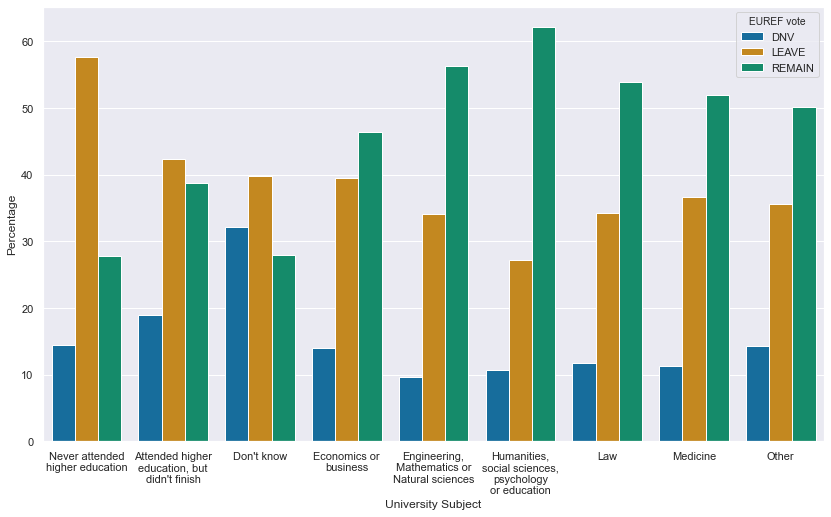

In [76]:
ct = pd.crosstab(index=subjects[mask],
            columns=eurefvote[mask],
            values=wts,aggfunc=sum,normalize='index')*100

df = ct.round(2).stack().reset_index()
df.columns = ["University Subject","EUREF vote","Percentage"]
plt.figure(figsize=(14,8));
sns.barplot(data=df,x="University Subject",y="Percentage",hue="EUREF vote");
